R Code pulled from https://www.statmethods.net/advgraphs/ggplot2.html

In [1]:
# ggplot2 examples
library(ggplot2) 

In [2]:
install.packages("fpp3")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [3]:
library(fpp3)

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.6     ✔ tsibble     1.1.1
✔ dplyr       1.0.7     ✔ tsibbledata 0.4.0
✔ tidyr       1.1.4     ✔ feasts      0.2.2
✔ lubridate   1.8.0     ✔ fable       0.3.1

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



State,Industry,.model,Month,Turnover,.mean
<chr>,<chr>,<chr>,<mth>,<dist>,<dbl>
Victoria,"Cafes, restaurants and catering services",ETS(Turnover),2019 Jan,"N(608, 978)",608.0680
Victoria,"Cafes, restaurants and catering services",ETS(Turnover),2019 Feb,"N(551, 1129)",551.0745
Victoria,"Cafes, restaurants and catering services",ETS(Turnover),2019 Mar,"N(622, 1856)",621.6172
Victoria,"Cafes, restaurants and catering services",ETS(Turnover),2019 Apr,"N(609, 2190)",609.3306
Victoria,"Cafes, restaurants and catering services",ETS(Turnover),2019 May,"N(602, 2539)",602.0018
Victoria,"Cafes, restaurants and catering services",ETS(Turnover),2019 Jun,"N(577, 2704)",576.9750
Victoria,"Cafes, restaurants and catering services",ETS(Turnover),2019 Jul,"N(607, 3413)",607.4074
Victoria,"Cafes, restaurants and catering services",ETS(Turnover),2019 Aug,"N(626, 4072)",625.9879
Victoria,"Cafes, restaurants and catering services",ETS(Turnover),2019 Sep,"N(614, 4358)",614.4748


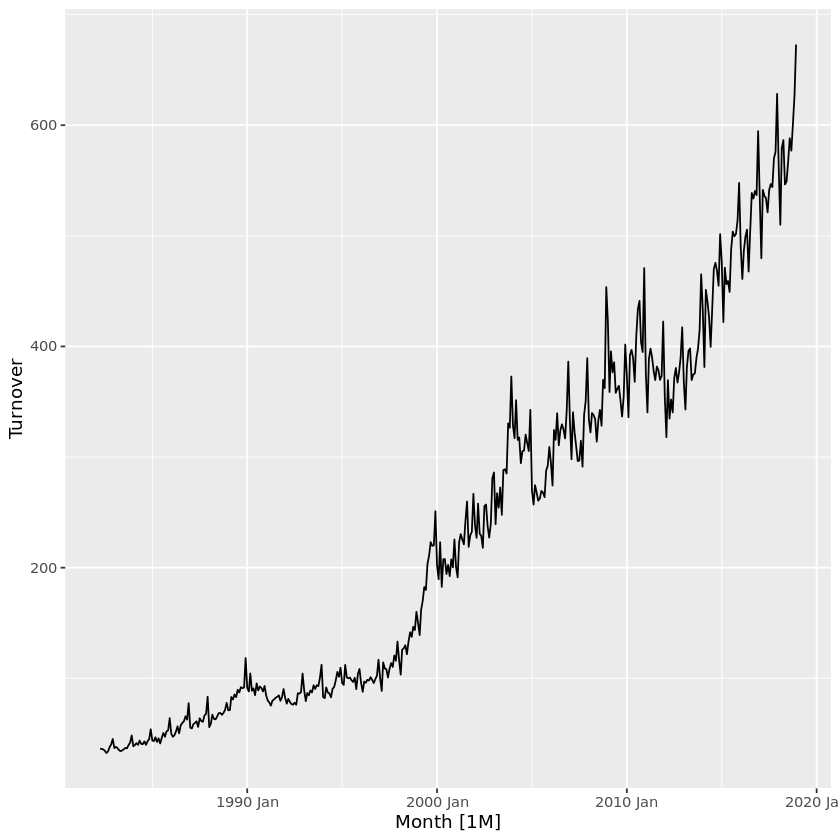

In [4]:
aus_retail |>
  filter(`Series ID`=="A3349640L") |>
  autoplot(Turnover)

# Produce some forecasts
aus_retail |>
  filter(`Series ID`=="A3349640L") |>
  model(ETS(Turnover)) |>
  forecast(h = "2 years")

In [4]:
#Load Data
Chips <- tibble(
  Month = c("2019 Jan","2019 Feb","2019 Mar","2019 Apr","2019 May","2019 Jun","2019 Jul","2019 Aug","2019 Sep","2019 Oct","2019 Nov","2019 Dec","2020 Jan","2020 Feb","2020 Mar","2020 Apr","2020 May","2020 Jun","2020 Jul","2020 Aug","2020 Sep","2020 Oct","2020 Nov","2020 Dec","2021 Jan","2021 Feb","2021 Mar","2021 Apr","2021 May","2021 Jun","2021 Jul","2021 Aug","2021 Sep","2021 Oct","2021 Nov","2021 Dec","2022 Jan","2022 Feb","2022 Mar","2022 Apr","2022 May","2022 Jun","2022 Jul","2022 Aug","2022 Sep","2022 Oct","2022 Nov","2022 Dec"), 
  Observation = c(1296,1112,1129,979,752,676,748,998,1299,1727,1992,1999,1700,1518,1508,1208,1157,915,1284,1494,1773,2135,2201,2195,1662,1305,1389,1164,908,1116,1471,1527,1771,1952,2005,2144,1837,1655,1692,1387,1351,1521,1694,1667,2034,2255,2342,2502)
)

In [5]:
head(Chips)

Month,Observation
<chr>,<dbl>
2019 Jan,1296
2019 Feb,1112
2019 Mar,1129
2019 Apr,979
2019 May,752
2019 Jun,676


In [6]:
#This can be converted to a tsibble object using the following code:

Chips <- Chips |>
  mutate(Month = yearmonth(Month)) |>
  as_tsibble(index = Month)

In [7]:
head(Chips)

Month,Observation
<mth>,<dbl>
2019 Jan,1296
2019 Feb,1112
2019 Mar,1129
2019 Apr,979
2019 May,752
2019 Jun,676


## Filter 4 Training Data

In [8]:
Chips_train <- Chips %>%
  filter(Month >= yearmonth("2019-01") & Month <= yearmonth("2021-12"))

In [9]:
tail(Chips_train)

Month,Observation
<mth>,<dbl>
2021 Jul,1471
2021 Aug,1527
2021 Sep,1771
2021 Oct,1952
2021 Nov,2005
2021 Dec,2144


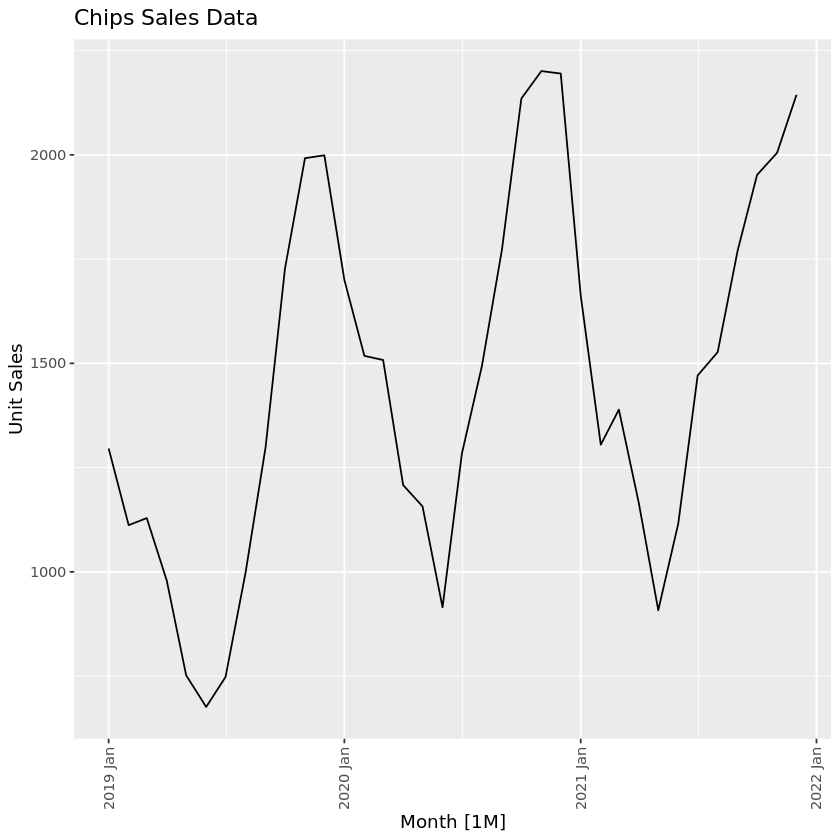

In [10]:
autoplot(Chips_train, Observation)+
  labs(y = "Unit Sales",
      title = "Chips Sales Data")+
      theme(axis.text.x = element_text(angle = 90, vjust = 0.5))
      

### Insights:
    1- There is an upward trend.
    2- There is a season pattern every december, due to Schools or End of year sales
    3- There is a drop every June and May.
    4- 2021 December peak growth is less than the prevoues year. 

## Seasonal plots


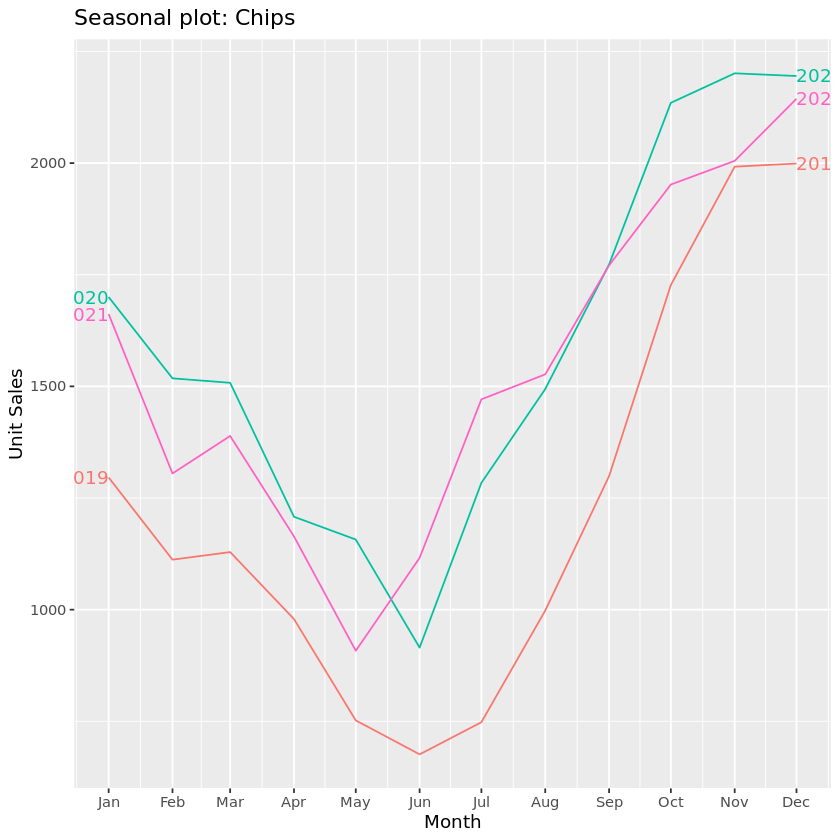

In [12]:
Chips_train |>
  gg_season(Observation, labels = "both") +
  labs(y = "Unit Sales",
       title = "Seasonal plot: Chips")

### Insights: Ramzan, Holidays, School
    1- Year 2021 is worse than 2020, due to tax increment in July 2020, Main reason 2020 is acctully worse than 2021 but it got better due to online and corona increased demand.
    2- The drop in June shifted to May in 2020 and 2021
    3- The sales between Feb and MAr got a litter better than the 2 years before
    4- only year 2022 has a drop in Aug
    
    5- From before: There is a season pattern every december

### Subseries

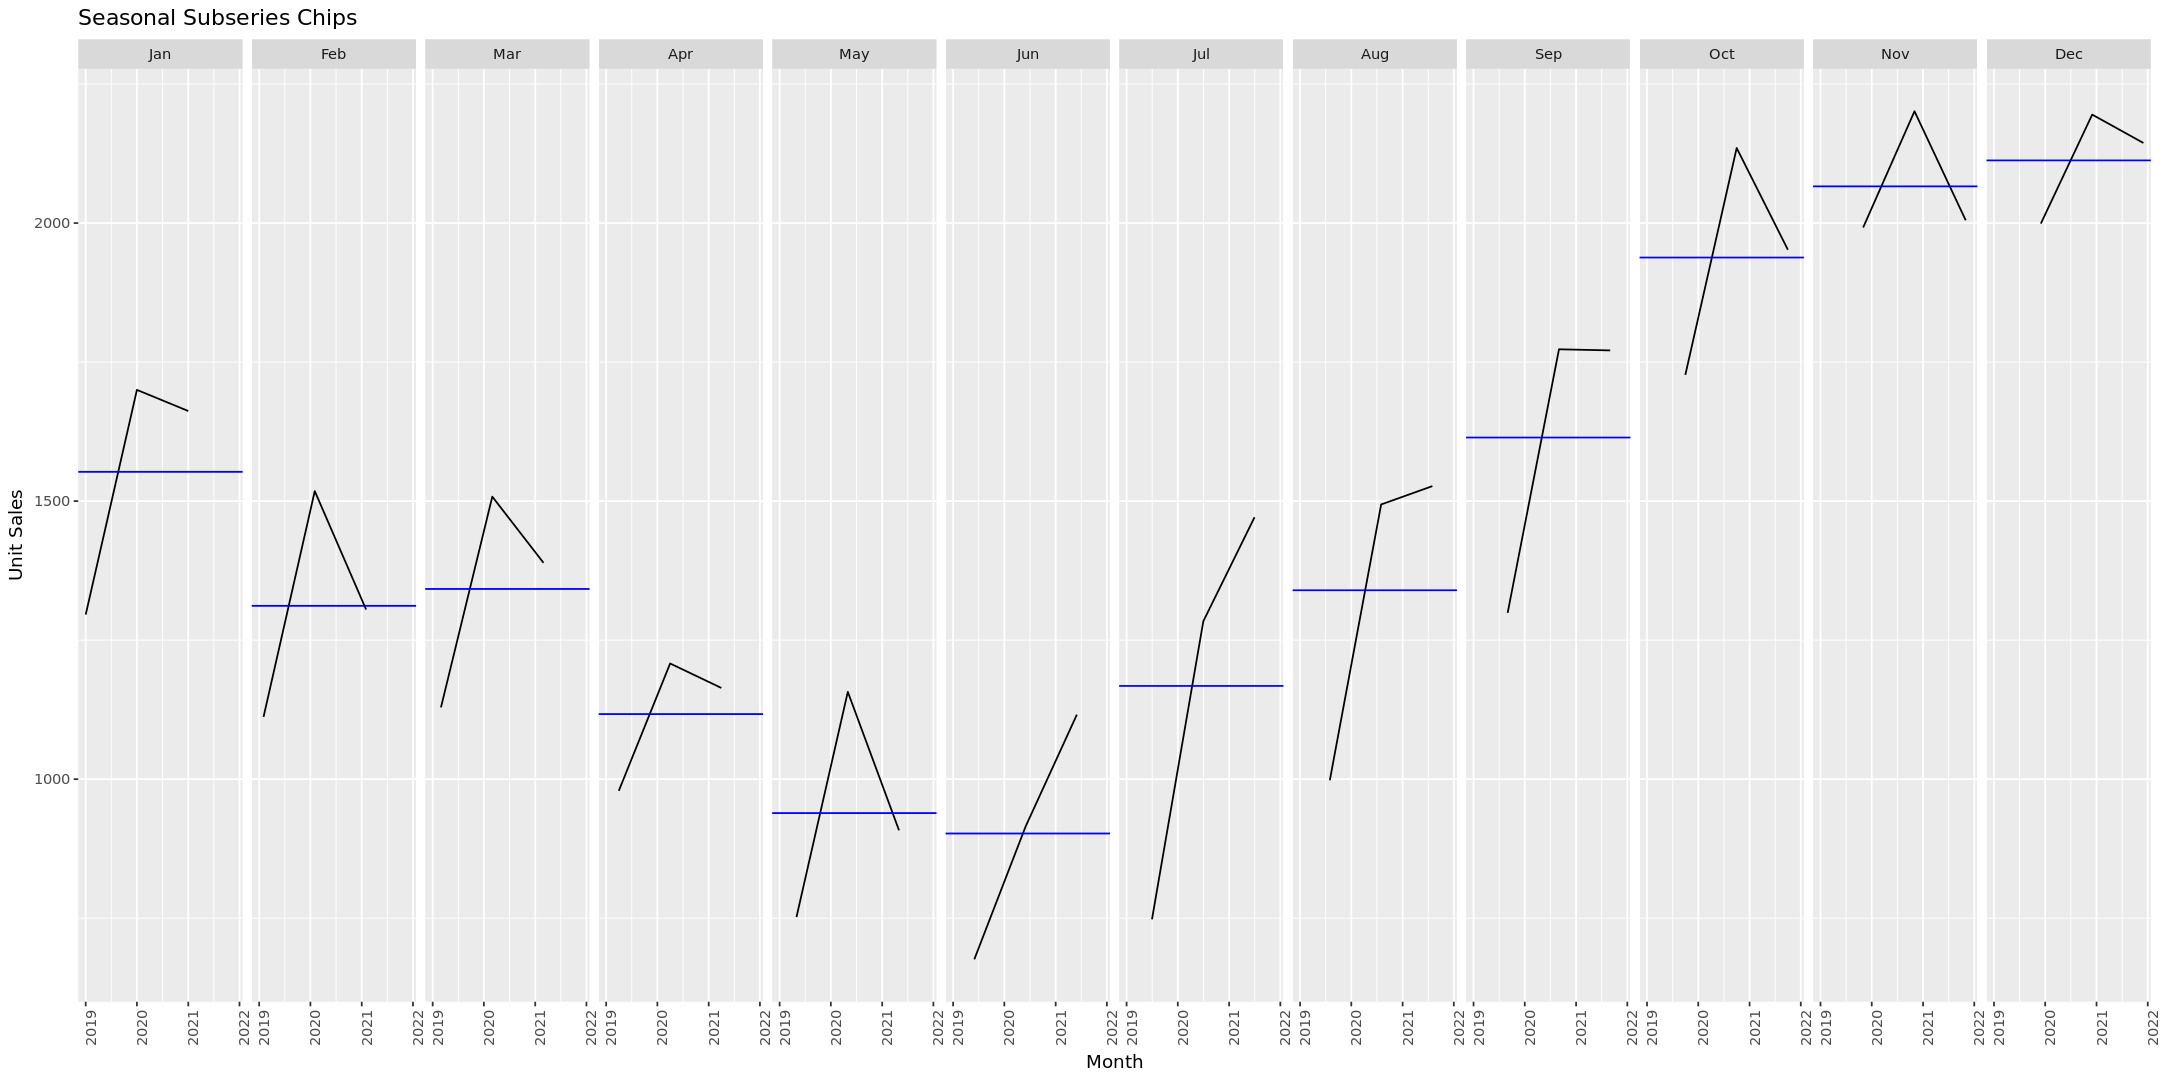

In [19]:
options(
  repr.plot.width = 18,   # Set the width in inches
  repr.plot.height = 9  # Set the height in inches
)

Chips_train |>
  gg_subseries(Observation) +
  labs(
    y = "Unit Sales",
    title = "Seasonal Subseries Chips"
  )

### Insights:
    1- 2021 Was below the erlier year in Jan-May and Sep-Oct 
    2- There are drop spikes where the 2021 is belwo the mean in FEb, may and nov


In [ ]:
Chips_train |>
  gg_lag(Observation, geom = "point") +
  labs(x = "lag(Observation, k)")